In [1]:
%matplotlib inline

In [40]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as diagnostic

In [4]:
cdf = pd.read_excel("./Module2_Caribbean_Assessment_File.xlsx", skiprows=[1], index_col=0, sheetname=[0,1,2,3,4])
cdf

{0:       bah_curr_avg  bah_curr_eop  bah_tot_empl  bah_unemp_rate  bah_ngdp  \
 1980             1             1           NaN             NaN  1.892210   
 1981             1             1           NaN             NaN  1.960330   
 1982             1             1           NaN             NaN  2.207332   
 1983             1             1           NaN             NaN  2.456760   
 1984             1             1           NaN             NaN  2.623820   
 1985             1             1           NaN             NaN  2.857340   
 1986             1             1           NaN       12.200000  3.088784   
 1987             1             1           NaN       11.500000  3.400777   
 1988             1             1           NaN       11.000000  3.535846   
 1989             1             1           NaN       11.700000  3.985768   
 1990             1             1           NaN       12.000000  3.800628   
 1991             1             1           NaN       12.300000  3.789278

In [9]:
cb_df = pd.concat([cdf[0], cdf[1], cdf[2], cdf[3], cdf[4]], axis=1)
cb_df.head()

,bah_curr_avg,bah_curr_eop,bah_tot_empl,bah_unemp_rate,bah_ngdp,bah_rgdp,bah_nimp,bah_rimp,bah_nexp,bah_rexp,...,atl_ngdp,atl_rgdp,atl_nimp,atl_rimp,atl_nexp,atl_rexp,atl_value_imp,atl_vol_imp,atl_value_exp,atl_vol_exp
1980,1,1,NaN,NaN,1.892210,4.065340,NaN,NaN,NaN,NaN,...,7.398326,375.070132,3.426045,476.372658,2.283358,363.774592,1.880132,7.283277,1.133178,3.735826
1981,1,1,NaN,NaN,1.960330,3.947445,NaN,NaN,NaN,NaN,...,8.273591,391.118831,3.261524,419.338249,2.712644,389.844687,1.783369,6.411276,1.354914,4.003555
1982,1,1,NaN,NaN,2.207332,4.196134,NaN,NaN,NaN,NaN,...,9.046327,397.766690,3.029170,362.810614,2.255999,288.278273,1.509312,5.547023,1.003043,2.960507
1983,1,1,NaN,NaN,2.456760,4.481471,NaN,NaN,NaN,NaN,...,10.089333,416.175100,3.341118,377.321044,2.598482,309.922118,1.526931,5.768873,1.106976,3.182781
1984,1,1,NaN,NaN,2.623820,4.589027,NaN,NaN,NaN,NaN,...,12.686347,421.389353,5.174894,350.316682,4.182458,350.294516,1.447834,5.356003,1.144905,3.597390


In [16]:
### Perform regression analysis
cb_df['log_bah_cpi_eop'] = np.log(1 + cb_df['bah_cpi_eop'].pct_change())
cb_df['log_jam_cpi_eop'] = np.log(1 + cb_df['jam_cpi_eop'].pct_change())
bah_exp_jam = sm.ols(formula="log_jam_cpi_eop ~ log_bah_cpi_eop", data=cb_df).fit()
jam_exp_bah = sm.ols(formula="log_bah_cpi_eop ~ log_jam_cpi_eop", data=cb_df).fit()
print(bah_exp_jam.summary())
print(jam_exp_bah.summary())

                            OLS Regression Results                            
Dep. Variable:        log_jam_cpi_eop   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.703
Date:                Tue, 21 Feb 2017   Prob (F-statistic):             0.0632
Time:                        08:31:03   Log-Likelihood:                 29.523
No. Observations:                  34   AIC:                            -55.05
Df Residuals:                      32   BIC:                            -51.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.0913      0.033     

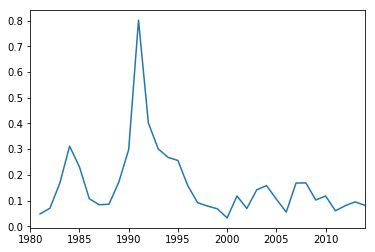

In [19]:
cb_df['jam_infl'] = cb_df['jam_cpi_eop'].pct_change()
cb_df['jam_infl'].plot()

In [20]:
cb_df['jam_cpi_eop']

1980      3.037947
1981      3.183387
1982      3.406329
1983      3.973732
1984      5.211874
1985      6.416529
1986      7.104493
1987      7.698687
1988      8.357216
1989      9.792693
1990     12.711844
1991     22.905812
1992     32.113948
1993     41.780246
1994     52.977352
1995     66.539554
1996     77.052804
1997     84.116041
1998     90.720130
1999     96.872722
2000    100.000000
2001    111.752527
2002    119.462433
2003    136.339359
2004    157.901752
2005    174.506679
2006    184.092767
2007    215.055398
2008    251.279613
2009    276.947317
2010    309.471764
2011    328.064428
2012    354.316622
2013    387.882566
2014    419.301054
Name: jam_cpi_eop, dtype: float64

In [31]:
atl_philips_curve = sm.ols(formula="atl_infl ~ atl_unemp_rate", data=cb_df).fit()
atl_philips_curve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               atl_infl   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     6.070
Date:                Tue, 21 Feb 2017   Prob (F-statistic):             0.0220
Time:                        22:32:01   Log-Likelihood:                -46.509
No. Observations:                  24   AIC:                             97.02
Df Residuals:                      22   BIC:                             99.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         11.8593      1.925      6.160      0.000         7.867    15.852
atl_unemp_rate    -0.6917      0.281     -2.464      0.022        -1.274    -0.109
==============================================================================
Omnibus:                        1.966   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.189
Skew:                           0.221   Prob(JB):                        0.552
Kurtosis:                       2.003   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
cb_df['lag_atl_unemp_rate'] = cb_df['atl_unemp_rate'].shift()
lag_atl_philips_curve = sm.ols(formula="atl_infl ~ atl_unemp_rate + lag_atl_unemp_rate", data=cb_df).fit()
lag_atl_philips_curve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               atl_infl   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     6.719
Date:                Tue, 21 Feb 2017   Prob (F-statistic):            0.00586
Time:                        22:32:29   Log-Likelihood:                -41.569
No. Observations:                  23   AIC:                             89.14
Df Residuals:                      20   BIC:                             92.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             11.2308      1.883      5.963      0.000         7.302    15.160
atl_unemp_rate        -1.9562      0.548     -3.572      0.002        -3.099    -0.814
lag_atl_unemp_rate     1.3337      0.501      2.663      0.015         0.289     2.378
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.440
Skew:                           0.130   Prob(JB):                        0.803
Kurtosis:                       2.374   Cond. No.                         55.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

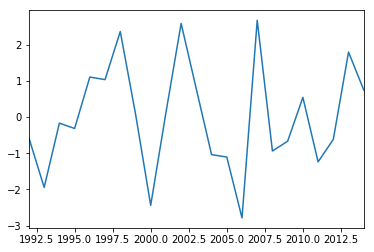

In [35]:
### Look at the residuals
lag_atl_philips_curve.resid.plot()

In [36]:
### Added in lagged variable for inflation
cb_df['lag_atl_infl'] = cb_df['atl_infl'].shift()
lag_atl_philips_curve = sm.ols(formula="atl_infl ~ atl_unemp_rate + lag_atl_unemp_rate + lag_atl_infl", data=cb_df).fit()
lag_atl_philips_curve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               atl_infl   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     4.314
Date:                Tue, 21 Feb 2017   Prob (F-statistic):             0.0176
Time:                        22:43:22   Log-Likelihood:                -41.506
No. Observations:                  23   AIC:                             91.01
Df Residuals:                      19   BIC:                             95.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             12.0097      3.080      3.899      0.001         5.562    18.457
atl_unemp_rate        -1.9708      0.562     -3.506      0.002        -3.147    -0.794
lag_atl_unemp_rate     1.3011      0.522      2.492      0.022         0.208     2.394
lag_atl_infl          -0.0649      0.200     -0.324      0.749        -0.484     0.354
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.400
Skew:                           0.078   Prob(JB):                        0.819
Kurtosis:                       2.373   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

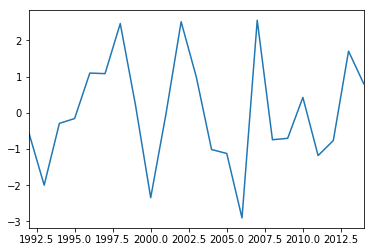

In [37]:
### Check if helped with autocorrelation
lag_atl_philips_curve.resid.plot()

In [46]:
### Perform autocorrelation test
result = diagnostic.acorr_breush_godfrey(lag_atl_philips_curve, nlags=3)
result

(3.5251989103255639,
 0.31750858293971446,
 0.96540451265702421,
 0.43315349464287145)

In [48]:
### Dynamic forecasting
atl_philips_curve_1 = sm.ols(formula="atl_infl ~ atl_unemp_rate + lag_atl_unemp_rate + lag_atl_infl", data=cb_df[cb_df.index < 2013]).fit()
atl_philips_curve_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               atl_infl   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4.290
Date:                Tue, 21 Feb 2017   Prob (F-statistic):             0.0199
Time:                        23:39:39   Log-Likelihood:                -37.977
No. Observations:                  21   AIC:                             83.95
Df Residuals:                      17   BIC:                             88.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             11.5591      3.163      3.655      0.002         4.886    18.232
atl_unemp_rate        -2.0630      0.591     -3.491      0.003        -3.310    -0.816
lag_atl_unemp_rate     1.4058      0.557      2.525      0.022         0.231     2.580
lag_atl_infl          -0.0321      0.208     -0.154      0.879        -0.471     0.407
==============================================================================
Omnibus:                        0.305   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.394
Skew:                           0.241   Prob(JB):                        0.821
Kurtosis:                       2.534   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""